In [1]:
# Another simple example usage of Gaussian Process
# essentially copied the example from Scikit-learn site:
# http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
# Contrived dataset. Each datapoint is 2d (x,y) where x is in [-1,1] and y is in [0,1]
X= np.array([-1,0, -0.9,0.12, -0.8,0.15, -0.7,0.23, -0.6,0.26, -0.5,0.29, -0.4,0.31, -0.3,0.35, -0.2,0.4, -0.1,0.46, -0.0,0.52, 0.1,0.6, 0.2,0.65, 0.3,0.72, 0.4,0.74, 0.5,0.85, 0.6,0.875, 0.7,0.9, 0.8,0.925, 0.9,0.95, 1.0,1.0])
X

array([-1.   ,  0.   , -0.9  ,  0.12 , -0.8  ,  0.15 , -0.7  ,  0.23 ,
       -0.6  ,  0.26 , -0.5  ,  0.29 , -0.4  ,  0.31 , -0.3  ,  0.35 ,
       -0.2  ,  0.4  , -0.1  ,  0.46 , -0.   ,  0.52 ,  0.1  ,  0.6  ,
        0.2  ,  0.65 ,  0.3  ,  0.72 ,  0.4  ,  0.74 ,  0.5  ,  0.85 ,
        0.6  ,  0.875,  0.7  ,  0.9  ,  0.8  ,  0.925,  0.9  ,  0.95 ,
        1.   ,  1.   ])

In [3]:
#function is z = sin(x^2 - 2.1*y)
X= X.reshape(21,2)
y=np.sin(X.T[0]**2 -2.1*X.T[1])
y=np.atleast_2d(y).T.ravel()

In [6]:
kernel = C(1.0, (1e-2, 1e2)) * RBF(0.5, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)

In [8]:
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=0.5), n_restarts_optimizer=1,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [9]:
x = np.array([-0.95,0,-0.923,0, -0.921,0, -0.78,0, -0.701,0, -0.6,0, -0.554,0, -0.4,0, -0.344,0, -0.32,0, -0.25,0, -0.175,0, -0.105,0, -0.001,0, 0.12,0, 0.225, 0, 0.53,0, 0.659,0, 0.70,0, 0.93,0 ]).reshape(20,2)

ypred, sigma = gp.predict(x, return_std=True)
x

array([[-0.95 ,  0.   ],
       [-0.923,  0.   ],
       [-0.921,  0.   ],
       [-0.78 ,  0.   ],
       [-0.701,  0.   ],
       [-0.6  ,  0.   ],
       [-0.554,  0.   ],
       [-0.4  ,  0.   ],
       [-0.344,  0.   ],
       [-0.32 ,  0.   ],
       [-0.25 ,  0.   ],
       [-0.175,  0.   ],
       [-0.105,  0.   ],
       [-0.001,  0.   ],
       [ 0.12 ,  0.   ],
       [ 0.225,  0.   ],
       [ 0.53 ,  0.   ],
       [ 0.659,  0.   ],
       [ 0.7  ,  0.   ],
       [ 0.93 ,  0.   ]])

In [10]:
# each datapoint in the test set is (x,0). Clearly when x is closer to -1, the variance should be smaller, because the
# training set contained a lot fo points near this point. Points near x=1 have much higher variance - lower confidence - 
# because there is no sample datapoints around this region.
from matplotlib import pyplot as plt
fig = plt.figure()
#plt.plot(x, y, 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X.T[0], y, 'r.', markersize=10, label=u'Observations')
plt.plot(x.T[0], ypred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([ypred - 1.9600 * sigma,
                        (ypred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$z$')
plt.ylim(-1.1, 1.1)
plt.legend(loc='upper left')

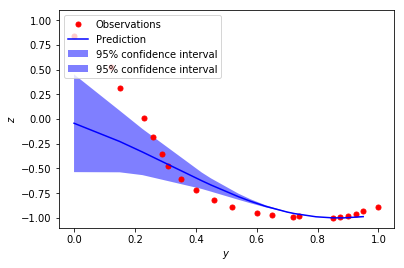

In [82]:
x2 = np.array([0.5, 0.0, 0.5, 0.15, 0.5, 0.225, 0.5, 0.42, 0.5, 0.45, 0.5, 0.54, 0.5, 0.58, 0.5, 0.63, 0.5, 0.7, 0.5, 0.725, 0.5, 0.795, 0.5, 0.85, 0.5, 0.887, 0.5, 0.95]).reshape(14,2)
ypred2, sigma2 = gp.predict(x2, return_std=True)


from matplotlib import pyplot as plt
fig = plt.figure()
#plt.plot(x, y, 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X.T[1], y, 'r.', markersize=10, label=u'Observations')
plt.plot(x2.T[1], ypred2, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x2, x2[::-1]]),
         np.concatenate([ypred2 - 1.9600 * sigma2,
                        (ypred2 + 1.9600 * sigma2)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$y$')
plt.ylabel('$z$')
plt.ylim(-1.1, 1.1)
plt.legend(loc='upper left')